## # 1 Understanding of the case study

## 1.1 Classification (Unsupervised) of vehicle into 4 types ( car 2 types, van, bus)

The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

## Step 1 :- Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.api as smg
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as scs

## 2 Data pre-processing

In [5]:
vehicle_df=pd.read_csv('vehicle.csv')

In [6]:
vehicle_df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [8]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [9]:
vehicle_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
compactness,95,91,104,93,85,107,97,90,86,93
circularity,48,41,50,41,44,NaN,43,43,34,44
distance_circularity,83,84,106,82,70,106,73,66,62,98
radius_ratio,178,141,209,159,205,172,173,157,140,NaN
pr.axis_aspect_ratio,72,57,66,63,103,50,65,65,61,62
max.length_aspect_ratio,10,9,10,9,52,6,6,9,7,11
scatter_ratio,162,149,207,144,149,255,153,137,122,183
elongatedness,42,45,32,46,45,26,42,48,54,36
pr.axis_rectangularity,20,19,23,19,19,28,19,18,17,22
max.length_rectangularity,159,143,158,143,144,169,143,146,127,146


In [10]:
vehicle_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


## Observation1 : Data has some impurities like NaN, missing data
## Observation2 : pr.axis_aspect_ratio, max.lenght_aspect_ratio,max.length_rectangularity, scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about and others have significant outliers

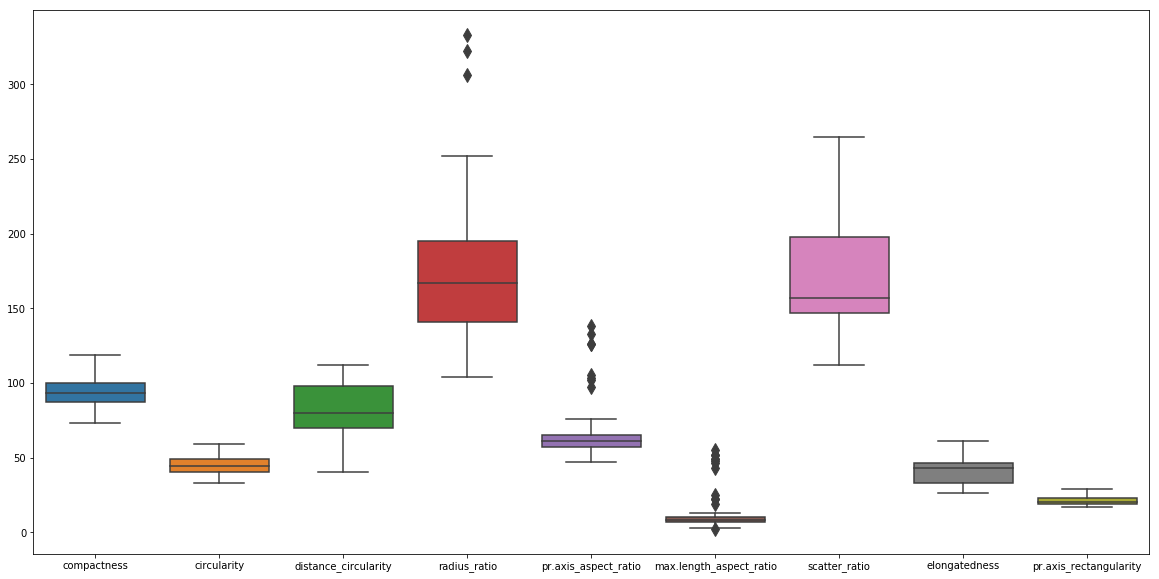

In [28]:
first_set = pd.DataFrame()
rest = pd.DataFrame()

first_set=vehicle_df[['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity']].copy()



plt.figure(figsize=(20,10))
b = sns.boxplot(data=first_set,fliersize=10)

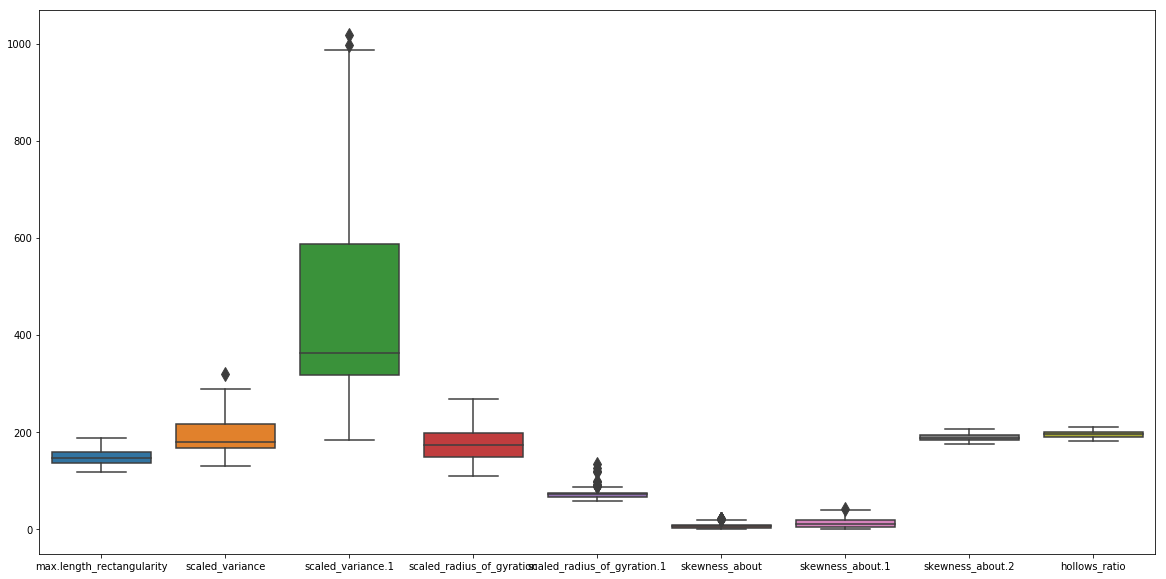

In [29]:
restdf = pd.DataFrame()

restdf=vehicle_df[['max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio','class']].copy()



plt.figure(figsize=(20,10))
b = sns.boxplot(data=restdf,fliersize=10)

In [30]:
vehicle_df.dropna()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car


In [35]:
vehicle_df.dtypes

compactness                    float64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio        float64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity      float64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                  float64
class                           object
dtype: object

In [31]:
for i in range(len(list(vehicle_df))-1):
    for x in range(vehicle_df.shape[0]):
        if vehicle_df.iloc[x,i]<(vehicle_df.iloc[:,i].quantile(0.25)- (1.5*scs.iqr(vehicle_df.iloc[:,i]))):
            vehicle_df.iloc[x,i]=(vehicle_df.iloc[:,i].quantile(0.25)- (1.5*scs.iqr(vehicle_df.iloc[:,i])))
        elif vehicle_df.iloc[x,i]>(vehicle_df.iloc[:,i].quantile(0.25)+(1.5*scs.iqr(vehicle_df.iloc[:,i]))):
            vehicle_df.iloc[x,i]=(vehicle_df.iloc[:,i].quantile(0.25)+(1.5*scs.iqr(vehicle_df.iloc[:,i])))
        else:
            vehicle_df.iloc[x,i]=vehicle_df.iloc[x,i]

C:\Users\Karthikeyan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


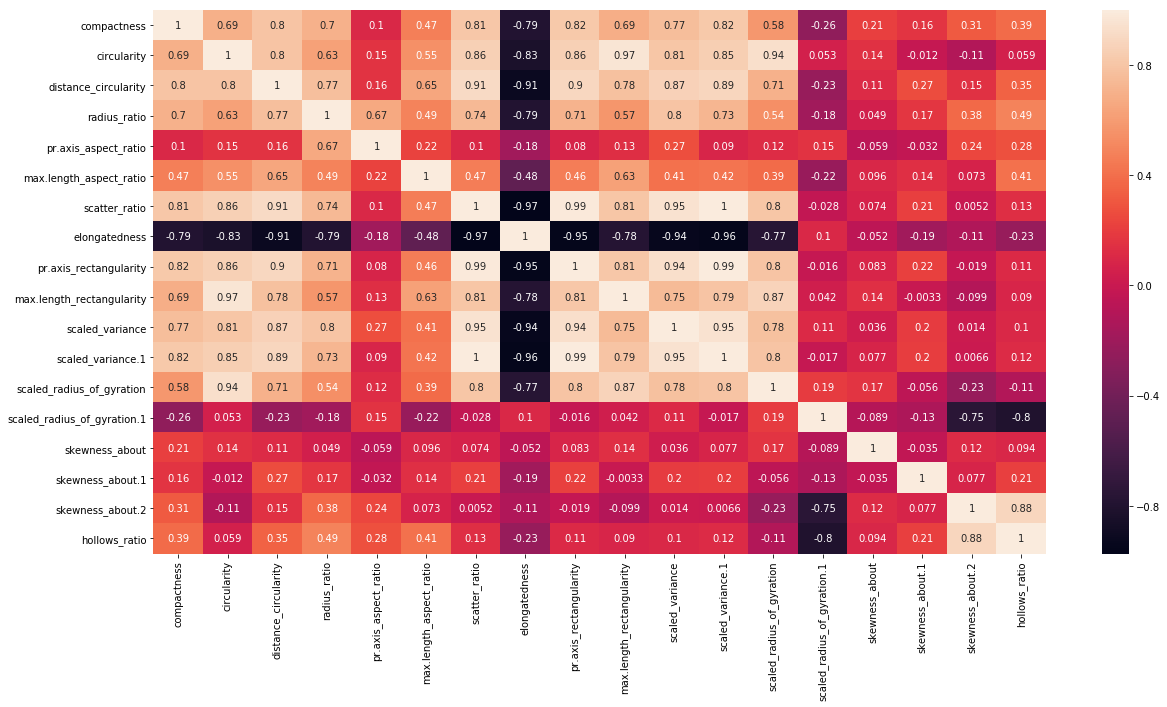

In [32]:
corr=vehicle_df.corr()

plt.figure(figsize=(20,10))

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);


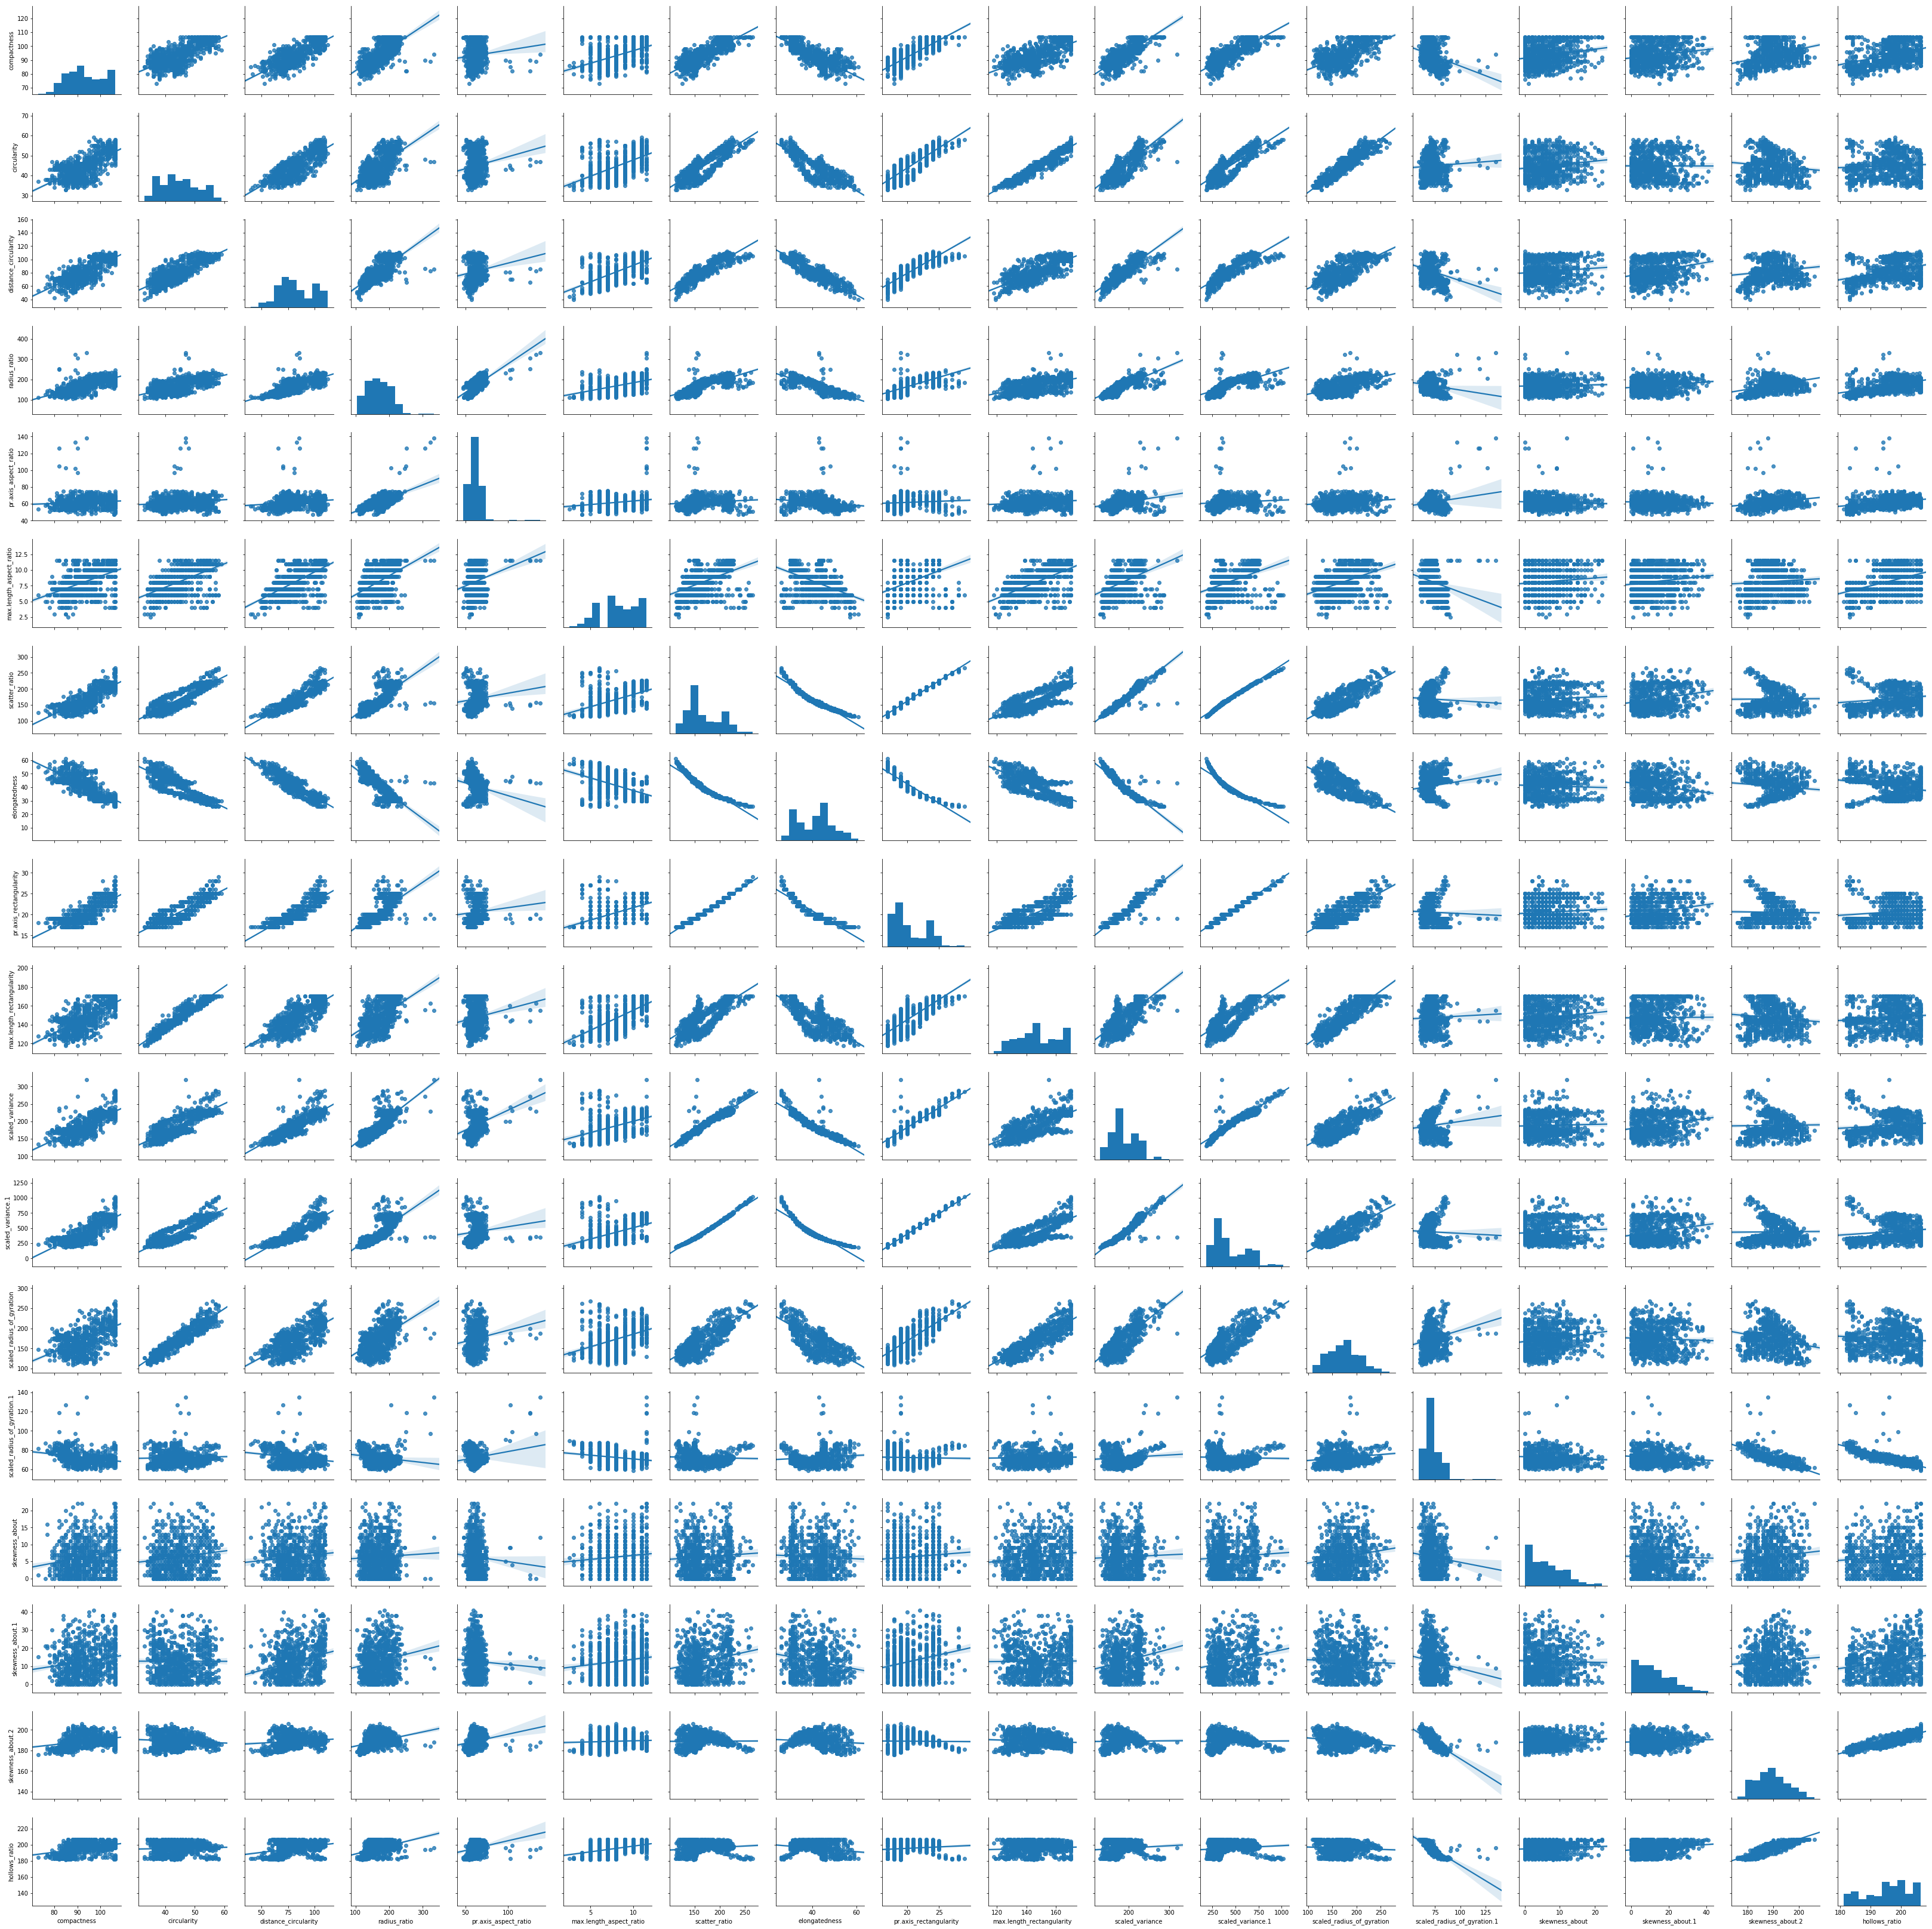

In [38]:
sns.pairplot(vehicle_df.dropna(),kind="reg")

##removing all the dependent variables with high correlation

In [40]:
X= vehicle_df[['hollows_ratio','skewness_about.2','skewness_about.1','skewness_about','scaled_radius_of_gyration.1','scaled_radius_of_gyration','max.length_aspect_ratio','pr.axis_aspect_ratio','compactness']]
y=vehicle_df['class']

In [41]:
X.shape

(846, 9)

In [42]:
y.shape

(846,)

##2 Preprocessing with Imputers

In [56]:
from sklearn.preprocessing import Imputer


def replace_missing_value(df, number_features):

    imputer = Imputer(strategy="median")
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

In [57]:
number_features = ['hollows_ratio','skewness_about.2','skewness_about.1','skewness_about','scaled_radius_of_gyration.1','scaled_radius_of_gyration','max.length_aspect_ratio','pr.axis_aspect_ratio','compactness']

In [58]:
X_new=replace_missing_value(X,number_features)

## 3. Performing PCA

In [59]:
X_standerdized = StandardScaler().fit_transform(X_new)

In [60]:
pd.DataFrame(X_standerdized).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,846.0,-1.852209e-15,1.000592,-2.009778,-0.727796,0.207705,0.762076,1.507011
1,846.0,-1.370850e-15,1.000592,-2.101034,-0.799927,-0.149374,0.663818,2.778117
2,846.0,-3.910715e-17,1.000592,-1.411710,-0.851529,-0.179311,0.716979,3.181777
3,846.0,-2.782119e-17,1.000592,-1.298215,-0.890081,-0.073812,0.538390,3.191265
4,846.0,-1.785904e-16,1.000592,-1.801003,-0.729238,-0.126370,0.342528,8.380770
5,846.0,1.742761e-16,1.000592,-2.020069,-0.790323,-0.037103,0.716116,2.868172
6,846.0,9.002518e-17,1.000592,-2.724833,-0.550108,-0.066836,0.899709,1.624617
7,846.0,3.732239e-16,1.000592,-1.863187,-0.593753,-0.085979,0.421794,9.688661
8,846.0,1.971105e-16,1.000592,-2.634595,-0.829844,-0.056379,0.845996,1.683916


In [61]:
cov_matrix = np.cov(X_standerdized.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.88440668  0.20743236  0.09400807 -0.80243135 -0.10515678
   0.41204603  0.27842092  0.39030693]
 [ 0.88440668  1.00118343  0.07740174  0.1154338  -0.749751   -0.22471583
   0.07367272  0.24016968  0.31460369]
 [ 0.20743236  0.07740174  1.00118343 -0.03503155 -0.12633227 -0.05621953
   0.13896394 -0.0320139   0.16096882]
 [ 0.09400807  0.1154338  -0.03503155  1.00118343 -0.08846001  0.16667971
   0.09671543 -0.05843967  0.21005237]
 [-0.80243135 -0.749751   -0.12633227 -0.08846001  1.00118343  0.19169941
  -0.22134602  0.15313091 -0.26063815]
 [-0.10515678 -0.22471583 -0.05621953  0.16667971  0.19169941  1.00118343
   0.38915009  0.12211524  0.58227671]
 [ 0.41204603  0.07367272  0.13896394  0.09671543 -0.22134602  0.38915009
   1.00118343  0.22301383  0.47310967]
 [ 0.27842092  0.24016968 -0.0320139  -0.05843967  0.15313091  0.12211524
   0.22301383  1.00118343  0.10084708]
 [ 0.39030693  0.31460369  0.16096882  0.21005237 -0.26063815  0.58227671


In [62]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 5.44205817e-01  1.44398525e-01  7.55419287e-01  2.91968250e-01
  -9.98007713e-02 -7.13641387e-02  1.08791777e-01  1.24939339e-02
  -6.36816623e-03]
 [ 4.85021150e-01  2.74525596e-01 -5.73469230e-01  4.86162577e-01
   2.91822805e-02  2.81005420e-01  7.79544196e-02  1.91979841e-01
   3.76877984e-02]
 [ 1.41589635e-01  6.09469119e-03 -7.59399088e-02  7.51330094e-04
  -1.33235233e-01  1.28468699e-01 -1.05215848e-01 -8.19734158e-01
   5.06811107e-01]
 [ 1.16737542e-01 -1.76310431e-01  1.65791332e-02 -4.28913352e-02
  -1.07514433e-02 -1.90737227e-01 -4.99395390e-01  4.67420956e-01
   6.69923917e-01]
 [-4.60135066e-01 -2.71936214e-01  1.50346133e-01  6.59181351e-01
   3.46706485e-01  9.09338940e-02  2.43358688e-01 -5.19429260e-03
   2.63586062e-01]
 [ 4.18674583e-02 -6.45784609e-01 -2.68275963e-02  1.70169660e-01
  -6.58999793e-01  2.81393117e-01 -5.92489525e-02  5.38862596e-02
  -1.77918356e-01]
 [ 2.90921524e-01 -4.04230545e-01 -2.51301254e-01  1.38547933e-01
   1.51993

In [63]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 5.44205817e-01  1.44398525e-01  7.55419287e-01  2.91968250e-01
  -9.98007713e-02 -7.13641387e-02  1.08791777e-01  1.24939339e-02
  -6.36816623e-03]
 [ 4.85021150e-01  2.74525596e-01 -5.73469230e-01  4.86162577e-01
   2.91822805e-02  2.81005420e-01  7.79544196e-02  1.91979841e-01
   3.76877984e-02]
 [ 1.41589635e-01  6.09469119e-03 -7.59399088e-02  7.51330094e-04
  -1.33235233e-01  1.28468699e-01 -1.05215848e-01 -8.19734158e-01
   5.06811107e-01]
 [ 1.16737542e-01 -1.76310431e-01  1.65791332e-02 -4.28913352e-02
  -1.07514433e-02 -1.90737227e-01 -4.99395390e-01  4.67420956e-01
   6.69923917e-01]
 [-4.60135066e-01 -2.71936214e-01  1.50346133e-01  6.59181351e-01
   3.46706485e-01  9.09338940e-02  2.43358688e-01 -5.19429260e-03
   2.63586062e-01]
 [ 4.18674583e-02 -6.45784609e-01 -2.68275963e-02  1.70169660e-01
  -6.58999793e-01  2.81393117e-01 -5.92489525e-02  5.38862596e-02
  -1.77918356e-01]
 [ 2.90921524e-01 -4.04230545e-01 -2.51301254e-01  1.38547933e-01
   1.51993

In [64]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8
0,3.071446,1.917695,0.039669,0.110403,0.258537,0.606586,1.153175,1.050209,0.80293


In [65]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8
0,3.071446,1.917695,0.039669,0.110403,0.258537,0.606586,1.153175,1.050209,0.80293


In [66]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 34.08683815  55.36937551  68.16728697  79.82248325  88.7333851
  95.46526279  98.33449834  99.55975202 100.        ]


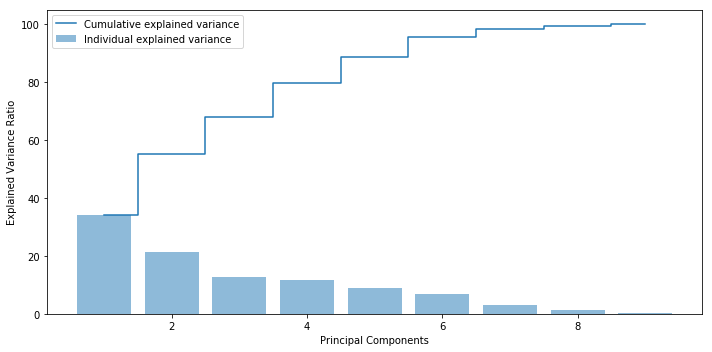

In [67]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [82]:
X_new.head()

,hollows_ratio,skewness_about.2,skewness_about.1,skewness_about,scaled_radius_of_gyration.1,scaled_radius_of_gyration,max.length_aspect_ratio,pr.axis_aspect_ratio,compactness
0,197.000,187.0,16.0,6.0,70.0,184.0,10.0,72.0,95.0
1,199.000,189.0,14.0,9.0,72.0,158.0,9.0,57.0,91.0
2,196.000,188.0,9.0,14.0,73.0,220.0,10.0,66.0,104.0
3,206.375,199.0,10.0,6.0,63.0,127.0,9.0,63.0,93.0
4,183.000,180.0,11.0,9.0,127.0,188.0,11.5,103.0,85.0


In [83]:
X_new.dtypes

hollows_ratio                  float64
skewness_about.2               float64
skewness_about.1               float64
skewness_about                 float64
scaled_radius_of_gyration.1    float64
scaled_radius_of_gyration      float64
max.length_aspect_ratio        float64
pr.axis_aspect_ratio           float64
compactness                    float64
dtype: object

In [84]:
X_standerdized = StandardScaler().fit_transform(X_new)

In [85]:
pca.fit(x_standerdized)

C:\Users\Karthikeyan\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:423: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [86]:
print(pca.components_)

[[1.]]


In [87]:
pd.DataFrame(pca.components_).corr()

,0
0,NaN


## SVC & SVM

In [71]:
svm = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':(0.01, 0.05, 0.5, 1),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
clf = GridSearchCV(svm, parameters)
clf.fit(x_standerdized,y)

ValueError: Found input variables with inconsistent numbers of samples: [1, 846]